# Left-Right symmetric model Lagrangian

In this notebook we study the potential in the reference of [Roitgrund2016](https://www.sciencedirect.com/science/article/pii/S0010465515004476?via%3Dihub) where they consider all vev real, $\beta_{1,2,3}=0$ and $v_L=0$. 

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [2]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### These fields are complex in general

In [3]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

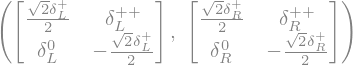

In [4]:
DeltaL, DeltaR

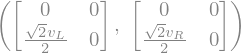

In [5]:
vL, vR, theta = symbols(r'v_L, v_R, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

### Bidoublet

In [6]:
phi1p = symbols(r'\phi_1^+')
phi2p = symbols(r'\phi_2^+')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

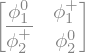

In [7]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

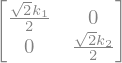

In [8]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

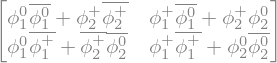

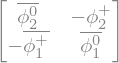

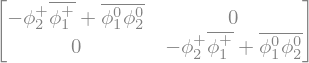

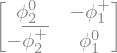

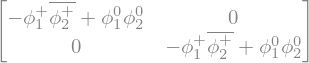

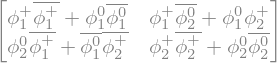

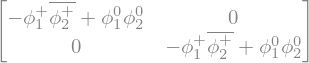

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

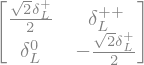

In [11]:
DeltaL

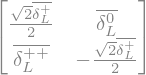

In [12]:
DeltaLDagger = Dagger(DeltaL)
DeltaLDagger

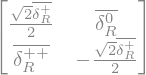

In [13]:
DeltaRDagger = Dagger(DeltaR)
DeltaRDagger

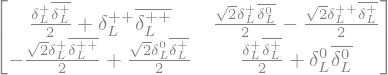

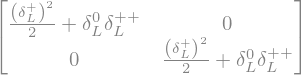

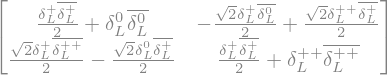

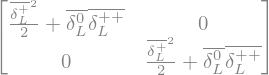

In [14]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

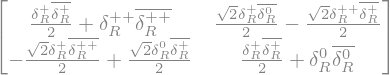

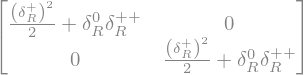

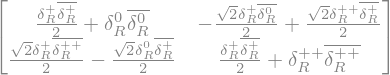

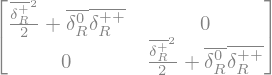

In [15]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [16]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
# beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [17]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) 
    )
    + alpha3*(
        trace(Phi*Phitilde*DeltaL*DeltaLDagger) + trace(PhiDagger*Phi*DeltaR*DeltaRDagger) #+
        #conjugate(trace(Phi*Phitilde*DeltaL*DeltaLDagger) + trace(PhiDagger*Phi*DeltaR*DeltaRDagger))
    )
    #+ beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    #+ beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    #+ beta3*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
#VLRPhi = VLRPhi + conjugate(VLRPhi)
#VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

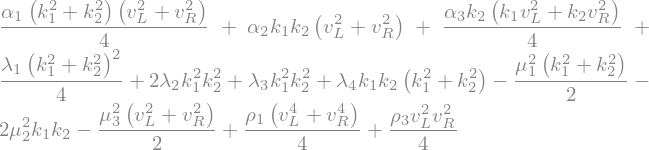

In [18]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

# Tadpole conditions

Calculation of the tadpole condition. In this case we only have four conditions because the vev are real.

In [19]:
scalar_vevs = [k1, k2, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.subs(vL, 0).diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4], factor)

In [20]:
from sympy import trigsimp

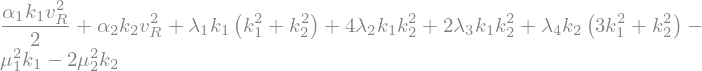

In [21]:
tadpole1_caso1 = tadpoles_relations[k1].trigsimp()
tadpole1_caso1

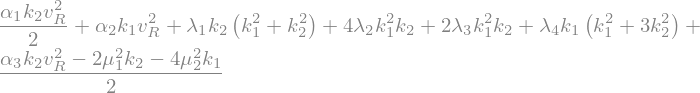

In [22]:
tadpole2_caso1 = tadpoles_relations[k2].trigsimp()
tadpole2_caso1

In [23]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [24]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

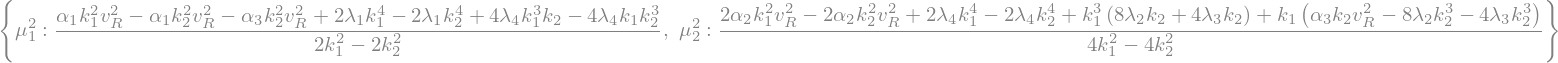

In [25]:
tadpole12_sol_caso1

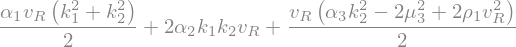

In [26]:
tadpole3_caso1 = tadpoles_relations[vR].trigsimp()
tadpole3_caso1

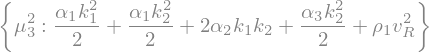

In [27]:
mu32_sol = solve([tadpole3_caso1], [mu32], dict=True)[0]
mu32_sol

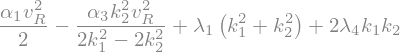

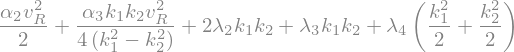

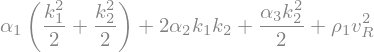

In [28]:
# activate to print the latex code of the tadpole econditions
from sympy import multiline_latex
tadpole_conditions = {}
for tadpole in [tadpole12_sol_caso1, mu32_sol]:
    for param, exp in tadpole.items():
        exp_vL0 = exp.subs(vL, 0).expand().collect([lamb1, lamb4, alpha1, alpha3], simplify)
        display(param, exp_vL0)
        #print(multiline_latex(param, exp_vL0, terms_per_line=3))
        tadpole_conditions[param] = exp_vL0
        print('\n')

In [29]:
b12, lamb14, lamb234, alpha12 = symbols(r'b_{12}, \lambda_{14}, \lambda_{234}, \alpha_{12}', positive=True)
tadpoles_paterns = {
    lamb1 + lamb4:lamb14,
    2*lamb2 + lamb3 + lamb4: lamb234,
    alpha1 + 2*alpha2:alpha12
}

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

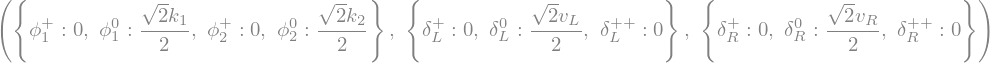

In [30]:
vevPhi, vevL, vevR

In [31]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i)/sqrt2,
    phi20: (k2 + phi20r + I*phi20i)/sqrt2,
    deltaR0: (vR + deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (0 + deltaL0r + I*deltaL0i)/sqrt2
}

In [32]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar mass matrices

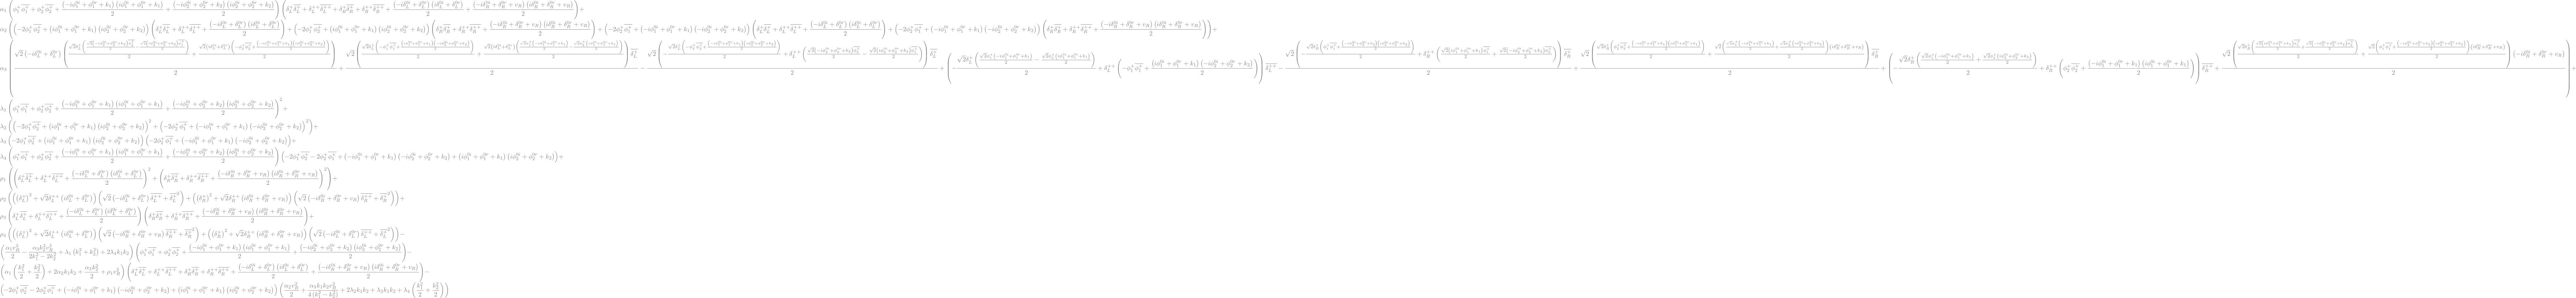

In [33]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole_conditions)
VLRPhi_ri_tadpole_caso1

In [34]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [35]:
vevL[deltaL0r] = 0#vevL[deltaL0]
vevL[deltaL0i] = 0
vevR[deltaR0r] = 0#vevR[deltaR0]
vevR[deltaR0i] = 0

In [36]:
from sympy import derive_by_array

In [37]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

## Neutral scalars

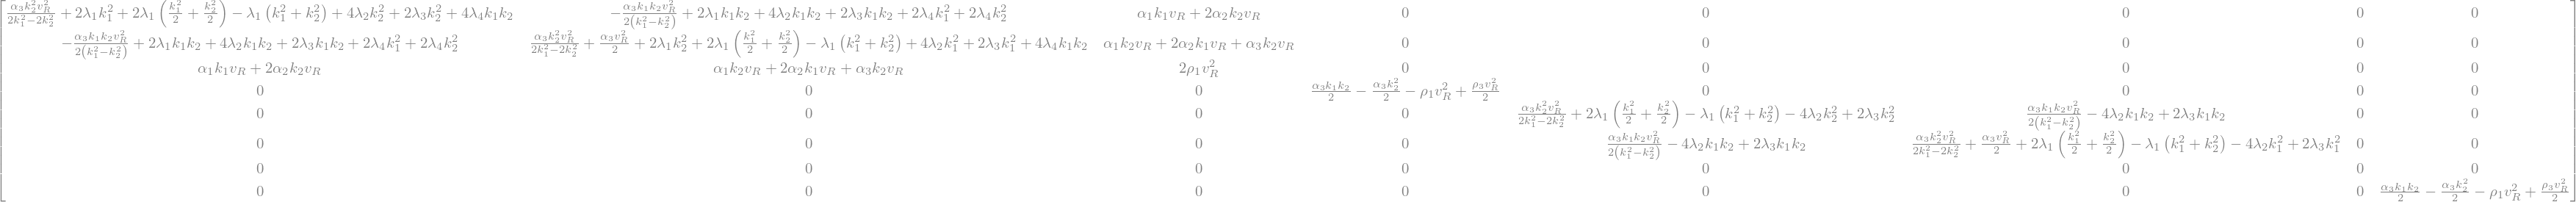

In [38]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR)
MRI_square

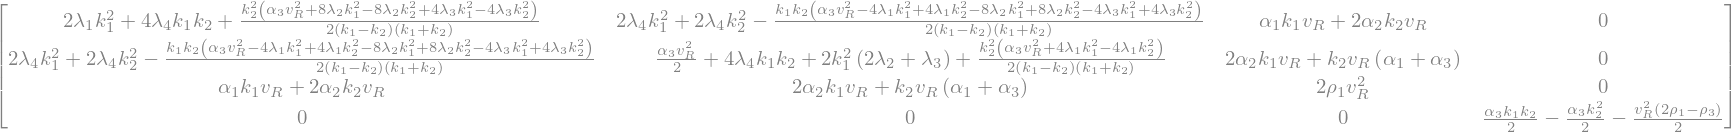

In [39]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().collect([k1, k2], factor))
Mrr

In [40]:
Mrr.rank()

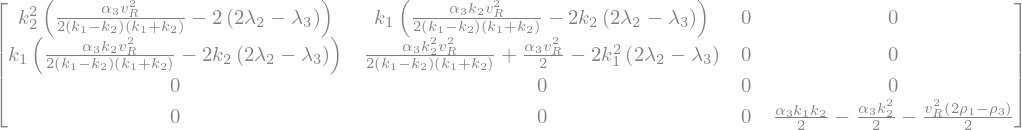

In [41]:
Mii = MRI_square[4:8, 4:8].applyfunc(
    lambda x: x.expand().trigsimp().collect([k1, k2], lambda x:x.collect([vL, vR],factor))
)
Mii

In [42]:
Mii.rank()

In [43]:
#Mii_vR = Mii.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
#Mii_vR

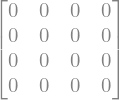

In [44]:
Mri = MRI_square[0:4, 4:8]
Mri

## Singly charges scalars

In [45]:
from sympy import Dummy

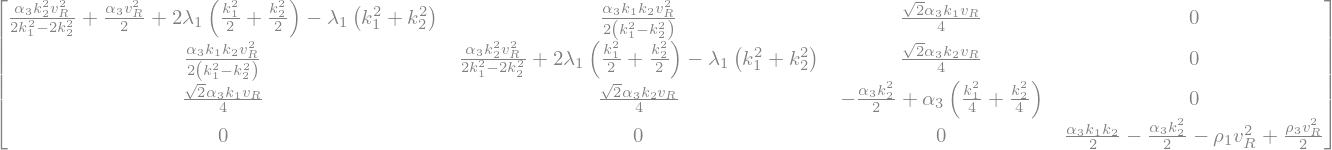

In [46]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\delta_R^{+,d}')
dummyconjugateLp = Dummy(r'\delta_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(deltaRp):dummyconjugateRp,
    conjugate(deltaLp):dummyconjugateLp
}
phim_fields = [dummyconjugate1p, dummyconjugate2p, dummyconjugateRp, dummyconjugateLp] #list(dummychangep.values())
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR)
Mp_square

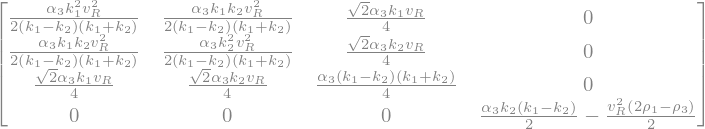

In [47]:
Mp_square.applyfunc(lambda x:x.collect([lamb1, lamb4, alpha1, alpha3], factor))

In [48]:
Mp_square.rank()

## Doubly charged scalars

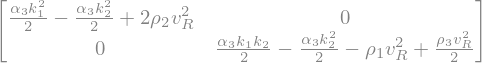

In [49]:
phipp_fields = [deltaRpp, deltaLpp]
dummyconjugateRpp = Dummy('deltaRpp')
dummyconjugateLpp = Dummy('deltaLpp')
dummychangepp = {
    conjugate(deltaRpp):dummyconjugateRpp,
    conjugate(deltaLpp):dummyconjugateLpp
}
phippc_fields = list(dummychangepp.values())#[deltaRmm, deltaLmm]
display(phippc_fields)
Mpp_square = (
    build_mass_matrix(VLRPhi_ri_tadpole_caso1.subs(dummychangepp), fields1=phippc_fields, fields2=phipp_fields)
).subs({value:key for key, value in dummychangepp.items()}).subs(
    vevPhi
).subs(vevL).subs(vevR)
Mpp_square#.applyfunc(factor)

# Diagonalization of mass matrices

The following two functions allows us calculate the mass matrices

## Doubly charged scalars

In [50]:
Ppp, Dpp = Mpp_square.diagonalize()

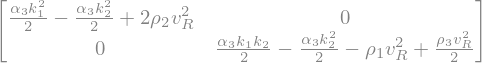

In [51]:
Dpp

In [52]:
from sympy import sin, cos

th = symbols(r'\theta', real=True)
k = symbols('k', positive=True)
k12_changes = {
    k1:k*sin(th),
    k2:k*cos(th)
}

In [53]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [54]:
from sympy import Eq

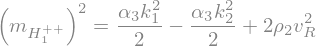

In [55]:
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq1

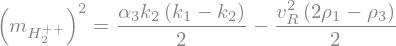

In [56]:
eq2 = Eq(mH2pp**2, Dpp[1,1].collect([vR], factor))
eq2

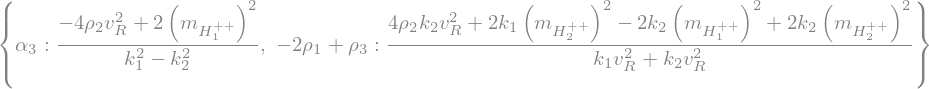

In [57]:
alpha3_rho13_sol = solve([eq1, eq2], [alpha3, rho3 - 2*rho1], dict=True)[0] # beta1*k1**2 + 2*beta2*k1**2
alpha3_rho13_sol

In [58]:
from sympy import multiline_latex

In [59]:
print(multiline_latex(eq1.lhs, eq1.rhs, terms_per_line=3))

\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \frac{\alpha_{3} k_{1}^{2}}{2} - \frac{\alpha_{3} k_{2}^{2}}{2} + 2 \rho_{2} v_{R}^{2} 
\end{align*}


$$
\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \alpha_{3} k_{1}^{2} - \alpha_{3} k_{2}^{2} + 4 \rho_{2} v_{R}^{2} 
\end{align*}
$$

## Mass singly charged scalars

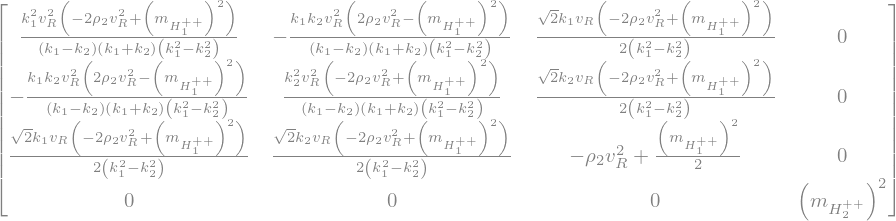

In [60]:
Mp_square = Mp_square.applyfunc(lambda x:x.collect(vR, factor)).subs(alpha3_rho13_sol).simplify()
Mp_square

In [61]:
Mp_square.applyfunc(factor).rank()

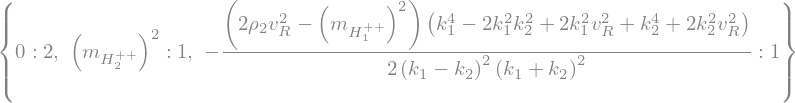

In [62]:
Mp_eigenvals_dict = Mp_square.applyfunc(factor).tomatrix().eigenvals()
Mp_eigenvals_dict

In [63]:
Pp, Dp = Mp_square.applyfunc(factor).tomatrix().diagonalize()

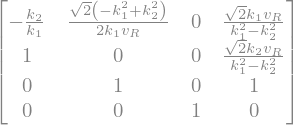

In [64]:
Pp

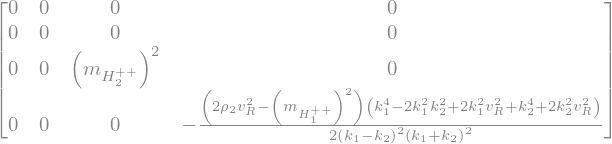

In [65]:
Dp = Dp.applyfunc(factor)
Dp

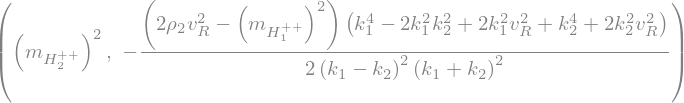

In [66]:
mH1p_exp, mH2p_exp = Dp[2,2], Dp[3,3]
mH1p_exp, mH2p_exp

In [67]:
mH1p, mH2p = symbols('m_{H_1^+}, m_{H_2^+}', positive=True)

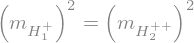

In [68]:
eq1p = Eq(mH1p**2, mH1p_exp.factor())
eq1p

In [69]:
print(multiline_latex(eq1p.lhs, eq1p.rhs))

\begin{align*}
\left(m_{H_1^+}\right)^{2} = & \left(m_{H_2^{++}}\right)^{2} 
\end{align*}


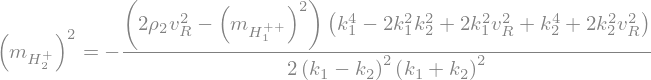

In [70]:
eq2p = Eq(mH2p**2, mH2p_exp.factor())
eq2p

In [71]:
print(multiline_latex(eq2p.lhs, eq2p.rhs))

\begin{align*}
\left(m_{H_2^+}\right)^{2} = &- \frac{\left(2 \rho_{2} v_{R}^{2} - \left(m_{H_1^{++}}\right)^{2}\right) \left(k_{1}^{4} - 2 k_{1}^{2} k_{2}^{2} + 2 k_{1}^{2} v_{R}^{2} + k_{2}^{4} + 2 k_{2}^{2} v_{R}^{2}\right)}{2 \left(k_{1} - k_{2}\right)^{2} \left(k_{1} + k_{2}\right)^{2}} 
\end{align*}


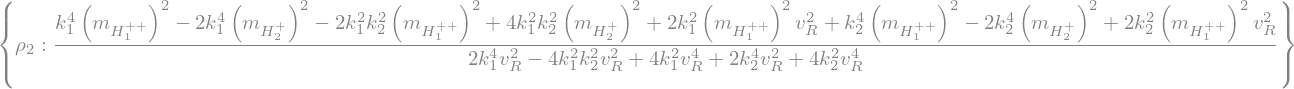

In [72]:
rho2_sol = solve([eq2p], [rho2], dict=True)[0]
rho2_sol

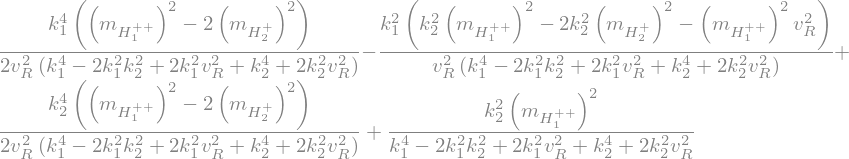

In [73]:
rho2_sol[rho2].expand().collect([k1, k2], factor)

In [74]:
alpha3_rho13_sol[rho3 - 2*rho1] = alpha3_rho13_sol[rho3 - 2*rho1].subs(rho2_sol).expand().collect([k1, k2], factor)

In [75]:
alpha3_rho13_sol[alpha3] = alpha3_rho13_sol[alpha3].subs(rho2_sol).expand().collect([k1, k2], factor)

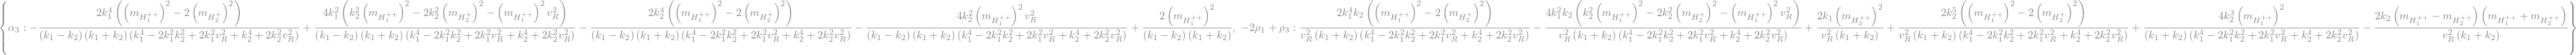

In [76]:
alpha3_rho13_sol

## Mass neutral scalars

## Cp odd

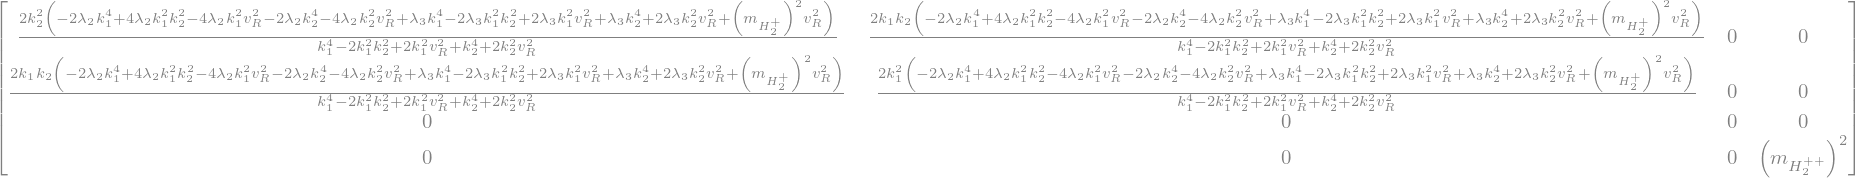

In [77]:

Mii_simplify = Mii.applyfunc(lambda x:x.collect([k1, k2], factor).collect([vR], factor)).subs(alpha3_rho13_sol).subs(rho2_sol).applyfunc(simplify)
Mii_simplify

In [78]:
Pii, Dii = Mii_simplify.diagonalize()

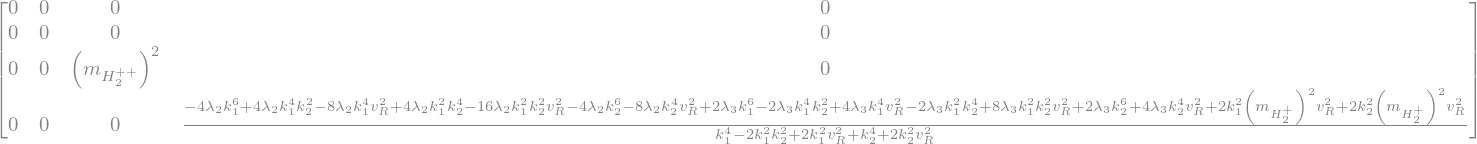

In [79]:
Dii

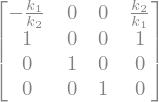

In [80]:
Pii

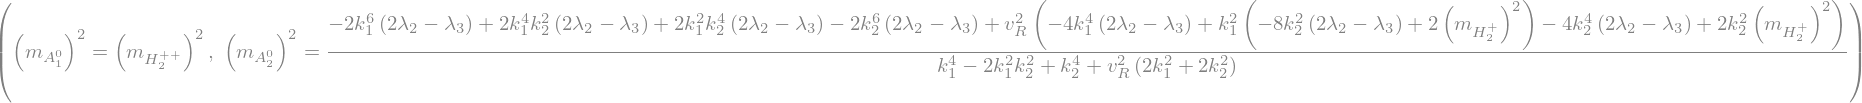

In [81]:
mA1 = symbols('m_{A_1^0}', positive=True)
mA2 = symbols('m_{A_2^0}', positive=True)
eq1ii = Eq(mA1**2, Dii[2,2].collect(vR, factor))
eq2ii = Eq(mA2**2, Dii[3,3].collect(vR, lambda x:x.collect([k1, k2], lambda x:x.collect([k1, k2], factor))))
eq1ii, eq2ii

In [82]:
print(multiline_latex(eq1ii.lhs, eq1ii.rhs))

\begin{align*}
\left(m_{A_1^0}\right)^{2} = & \left(m_{H_2^{++}}\right)^{2} 
\end{align*}


In [83]:
print(multiline_latex(eq2ii.lhs, eq2ii.rhs))


\begin{align*}
\left(m_{A_2^0}\right)^{2} = & \frac{- 2 k_{1}^{6} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 k_{1}^{4} k_{2}^{2} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 k_{1}^{2} k_{2}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) - 2 k_{2}^{6} \left(2 \lambda_{2} - \lambda_{3}\right) + v_{R}^{2} \left(- 4 k_{1}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) + k_{1}^{2} \left(- 8 k_{2}^{2} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 \left(m_{H_2^+}\right)^{2}\right) - 4 k_{2}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 k_{2}^{2} \left(m_{H_2^+}\right)^{2}\right)}{k_{1}^{4} - 2 k_{1}^{2} k_{2}^{2} + k_{2}^{4} + v_{R}^{2} \left(2 k_{1}^{2} + 2 k_{2}^{2}\right)} 
\end{align*}


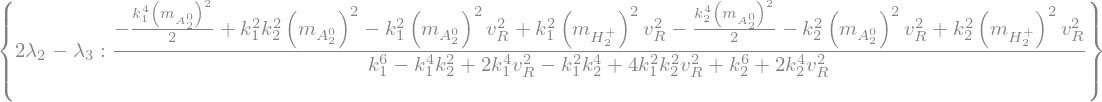

In [84]:
lamb23_sol = solve(eq2ii, 2*lamb2 - lamb3, dict=True)[0]
lamb23_sol

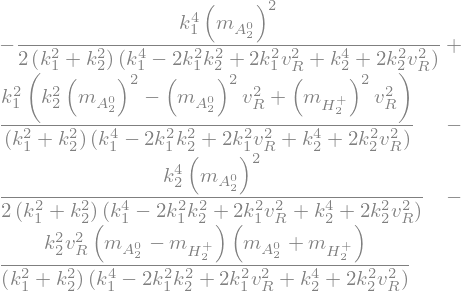

In [85]:
lamb23_sol[2*lamb2 - lamb3].expand().collect([k1, k2], factor)

## CP even

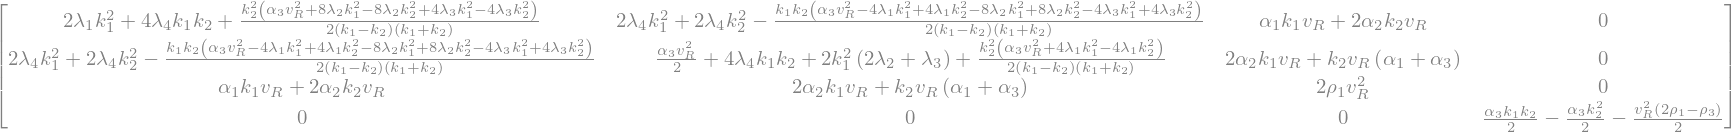

In [86]:
Mrr

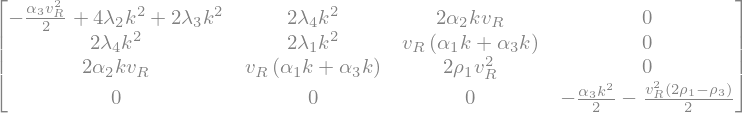

In [87]:
Mrr_th_zero = Mrr.applyfunc(lambda x:x.expand().collect(vR, factor)).subs(k12_changes).subs(th, 0)
Mrr_th_zero

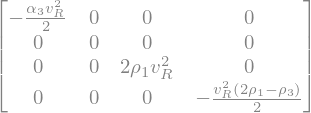

In [88]:
Mrr_th_zero.subs(k,0)

In [89]:
#Prr, Drr = Mrr_th_zero[0:3,0:3].diagonalize()

In [90]:
#Prr

In [91]:
#Drr

In [92]:
#terminsqrt_rr = (Drr[2,2] - Drr[3,3]).simplify().args[1].args[0]
#terminsqrt_rr

In [93]:
#terminsqrt_approx_rr =terminsqrt_rr.collect(k1, lambda x:x.collect(vR, factor))

In [94]:
#Drr[2,2] = Drr[2,2].subs(
#        terminsqrt_rr,
#        terminsqrt_approx_rr
#    ).collect([k1**2])

#Drr[3,3] = Drr[3,3].subs(
#        terminsqrt_rr,
#        terminsqrt_approx_rr
#    ).collect([k1**2])

In [95]:
#Drr[2,2]

In [96]:
#mH1, mH2, mH3, mH4 = symbols('m_{H_1}, m_{H_2}, m_{H_3}, m_{H_4}', positive=True)

In [97]:
#eq3rr = Eq(mH3**2, Drr[2,2])
#eq4rr = Eq(mH4**2, Drr[3,3])

In [98]:
#eq3rr

In [99]:
#print(multiline_latex(eq3rr.lhs, eq3rr.rhs, terms_per_line=5))

In [100]:
#print(multiline_latex(eq4rr.lhs, eq4rr.rhs, terms_per_line=5))

In [101]:
#lamb134_alpha12_sol = solve([eq3rr, eq4rr], [alpha12, lamb134], dict=True)
#lamb134_alpha12_sol

In [102]:
#lamb134_alpha12_sol[0][lamb134].factor()

# Yukawa charged lepton sector

In [103]:
from sympy import IndexedBase, Idx

In [104]:
#Indexed?

In [105]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hlij = symbols(r'h_{Lij}')
hltij = symbols(r'\tilde{h}_{Lij}')
hMij = symbols('h_{Mij}')

In [106]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
nuLc = IndexedBase(r'{{\nu_{L}^c}}')
nuRc = IndexedBase(r'{{\nu_{R}^c}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [107]:
nueL, nuL[i]

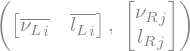

In [183]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

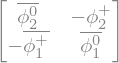

In [184]:
Phitilde

In [185]:
from sympy.physics.matrices import msigma

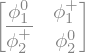

In [186]:
Phi

In [193]:
LY = (
    Dagger(LLi)*(
        hlij*Phi + 
        hltij*Phitilde
    )*LRj
)[0]#.subs(vevPhi)

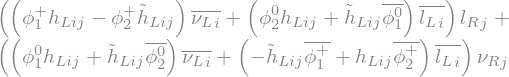

In [194]:
LY

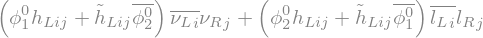

In [192]:
LY.subs(phi1p,0).subs(phi2p,0)

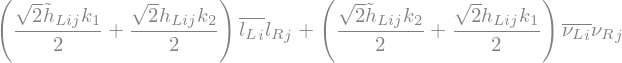

In [188]:
LY_vev = LY.subs(vevPhi)
LY_vev

As a result 
$$M_l = \frac{1}{\sqrt{2}}\left(\tilde{h}_{L,ij}k_1 + h_{L,ij} k_2 \right) $$
$$M_\nu = \frac{1}{\sqrt{2}}\left(h_{L,ij} k_1 + \tilde{h}_{L,ij}k_2 \right) $$

In [167]:
OmegaL = I*msigma(2)*DeltaL
OmegaR = I*msigma(2)*DeltaR

In [168]:
LY = -hMij*(
    (LLi.T*OmegaL*LLi)[0] + (LRj.T*OmegaR*LRj)[0]
)
    

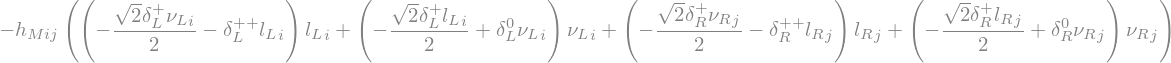

In [169]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml

Consider the following Lagrangian

$$
\mathcal{L_Y^\nu} = -\bar{\nu}_{i,L}^{\prime}\left(h_{L,ij}\phi_{1}^{0}+\tilde{h}_{L,ij}\phi_{2}^{0*}\right)\nu_{R,j}^{\prime}
- \bar{E^\prime}_{L,i}\left(h_{L,ij}\phi_{2}^{0}+\tilde{h}_{L,ij}\phi_{1}^{0*}\right)E_{R,j}^{\prime}\\
- \bar{\nu}_{L,ij}^{\prime}\left(h_{L,ij}\phi_{1}^{+}-\tilde{h}_{L,ij}\phi_{2}^{+}\right)E_{R,j}^{\prime}
- \bar{E}_{L,i}^{\prime}\left(h_{L,ij}\phi_{2}^{-}+\tilde{h}_{L,ij}\phi_{1}^{-}\right)\nu_{R,j}^{\prime}\\
+\left\{ -\overline{\left(\nu^{\prime c}\right)_{R,i}}h_{M,ij}\delta_{L}^{0}\nu_{L,j}^{\prime}+\overline{\left(E^{\prime c}\right)_{R,i}}h_{M,ij}\delta_{L}^{++}E_{L,j}^{\prime}\right.\\
+\left.\frac{1}{\sqrt{2}}\overline{\left(\nu^{\prime c}\right)_{R,i}}h_{M,ij}\delta_{L}^{+}E_{L,j}^{\prime}+\frac{1}{\sqrt{2}}\overline{\left(E^{\prime c}\right)_{R,i}}h_{M,ij}\delta_{L}^{+}\nu_{L,j}^{\prime}+(L\leftrightarrow R)\right\} +\text{ h.c. }
$$

where $\bar{\nu}_{L,i}^{\prime}$ and $\bar{E^\prime}_{R,j}$ are neutrino and charged lepton spinors for each familie, $\phi_{1}^{0}$, $\phi_{2}^{0}$, $\phi_{1}^{0}$, $\delta_{L}^{0}$, are neutral scalar fields, $\phi_{1}^{\pm}$, $\phi_{2}^{\pm}$, $\delta_{L}^{+}$ are charged scalars and finally, $\delta_{L}^{++}$ is a doubly charged scalar. Also, $h_L$, $\tilde{h}_L$ and $h_M$ denotes Yukawa matrices. 

The relations among nonphysical Higgs particles and the physical ones and Goldstone bosons are given by ($G$ denotes a Goldstone boson)
$$
\begin{aligned}
\phi_1^0 & =\frac{1}{\sqrt{2} \kappa_{+}}\left[H_0^0\left(\kappa_1 a_0-\kappa_2 b_0\right)+H_1^0\left(\kappa_1 a_1-\kappa_2 b_1\right)+H_2^0\left(\kappa_1 a_2-\kappa_2 b_2\right)+i \kappa_1 \tilde{G}_1^0-i \kappa_2 A_1^0\right], \\
\phi_2^0 & =\frac{1}{\sqrt{2} \kappa_{+}}\left[H_0^0\left(\kappa_2 a_0+\kappa_1 b_0\right)+H_1^0\left(\kappa_2 a_1+\kappa_1 b_1\right)+H_2^0\left(\kappa_2 a_2+\kappa_1 b_2\right)-i \kappa_2 \tilde{G}_1^0-i \kappa_1 A_1^0\right], \\
\delta_L^0 & =\frac{1}{\sqrt{2}}\left(H_3^0+i A_2^0\right), \\
\delta_R^0 & =\frac{1}{\sqrt{2}}\left(c_0 H_0^0+c_1 H_1^0+c_2 H_2^0+i \tilde{G}_2^0\right), \\
\phi_1^{+} & =\frac{\kappa_1}{\kappa_{+} \sqrt{1+\left(\frac{\kappa_{-}^2}{\sqrt{2} \kappa_{+} v_R}\right)^2}} H_2^{+}-\frac{\kappa_1}{\kappa_{+} \sqrt{1+\left(\frac{\sqrt{2} \kappa_{+} v_R}{\kappa_{-}^2}\right)^2}} G_R^{+}-\frac{\kappa_2}{\kappa_{+}} G_L^{+} \equiv a_{12} H_2^{+}+a_{1 R} G_R^{+}+a_{1 L} G_L^{+}, \\
\phi_2^{+} & =\frac{\kappa_2}{\kappa_{+} \sqrt{1+\left(\frac{\kappa_{-}^2}{\sqrt{2} \kappa_{+} v_R}\right)^2}} H_2^{+}-\frac{\kappa_{+} \sqrt{1+\left(\frac{\sqrt{2} \kappa_{+} v_R}{\kappa_{-}^2}\right)^2}}{\kappa_R^{+}}+\frac{\kappa_1}{\kappa_{+}} G_L^{+} \equiv a_{22} H_2^{+}+a_{2 R} G_R^{+}+a_{2 L} G_L^{+}, \\
\delta_L^{+} & =H_1^{+}, \\
\delta_R^{+} & =\frac{1}{\sqrt{1+\left(\frac{\kappa_{-}^2}{\sqrt{2} \kappa_{+} v_R}\right)^2}} G_R^{+}+\frac{1}{\sqrt{1+\left(\frac{\sqrt{2} \kappa_{+} v_R}{\kappa_{-}^2}\right)^2}} H_2^{+} \equiv a_{R R} G_R^{+}+a_{R 2} H_2^{+} .
\end{aligned}
$$

In [68]:
import sympy as sp
sp.init_printing()

# Define symbols
kappa_1, kappa_2, kappa_plus = sp.symbols("kappa_1 kappa_2 kappa_+", positive=True)
h_L, h_tilde_L, h_M = sp.symbols(r"h_L \tilde{h}_L h_M")#, cls=sp.Function)
a_0, a_1, a_2 = sp.symbols("a_0 a_1 a_2", real=True)
b_0, b_1, b_2 = sp.symbols("b_0 b_1 b_2", real=True)
c_0, c_1, c_2 = sp.symbols("c_0 c_1 c_2", real=True)

# Physical fields
H_0, H_1, H_2, H_3 = sp.symbols("H_0 H_1 H_2 H_3", real=True)#, cls=sp.Function)
A_1, A_2 = sp.symbols("A_1 A_2", real=True)#, cls=sp.Function)
G_tilde_10, G_tilde_20 = sp.symbols(
    r"{{\tilde{G}_1^0}} {{\tilde{G}_2^0}}", real=True
)#, cls=sp.Function)
G_tilde_Rp, G_tilde_Lp  = sp.symbols(
    r"{{\tilde{G}_R^+}} {{\tilde{G}_L^+}}",
)
H1_plus, H2_plus = sp.symbols("{{H_1^+}} {{H_2^+}}")#, cls=sp.Function)
delta_L_plus, delta_L_pp = sp.symbols(r"{{\delta_L^+}} {{\delta_L^++{}}}")#, cls=sp.Function)

# Mixing coefficients
a_12, a_22, a_1R, a_2R, a_1L, a_2L = sp.symbols("a_12 a_22 a_1R a_2R a_1L a_2L", real=True)

# Fermion spinors
nu_L, nu_R = sp.symbols("nu_L nu_R")#, cls=sp.Function)
E_L, E_R = sp.symbols("E_L E_R")#, cls=sp.Function)

# Scalar fields in terms of physical fields
phi1_0 = (1 / (sp.sqrt(2)*kappa_plus)) * (
    H_0*(kappa_1 * a_0 - kappa_2 * b_0) +
    H_1*(kappa_1 * a_1 - kappa_2 * b_1) +
    H_2*(kappa_1 * a_2 - kappa_2 * b_2) +
    sp.I * kappa_1 * G_tilde_10 - sp.I * kappa_2 * A_1
)

phi2_0 = (1 / (sp.sqrt(2)*kappa_plus)) * (
    H_0*(kappa_2 * a_0 + kappa_1 * b_0) +
    H_1*(kappa_2 * a_1 + kappa_1 * b_1) +
    H_2*(kappa_2 * a_2 + kappa_1 * b_2) -
    sp.I * kappa_2 * G_tilde_10 - sp.I * kappa_1 * A_1
)

delta_L_0 = (1 / sp.sqrt(2)) * (H_3 + sp.I * A_2)

delta_R_0 = (1 / sp.sqrt(2)) * (c_0*H_0 + c_1*H_1 + c_2*H_2 + sp.I*G_tilde_20)

# Charged fields
phi1_plus = a_12 * H2_plus + a_1R * G_tilde_Rp + a_1L * G_tilde_Lp
phi2_plus = a_22 * H2_plus + a_2R * G_tilde_Rp + a_2L * G_tilde_Lp

# Lagrangian terms for physical fields
L_neutral = -nu_L.conjugate() * (h_L * phi1_0 + h_tilde_L * phi2_0.conjugate()) * nu_R
L_charged = -nu_L.conjugate() * (h_L * phi1_plus - h_tilde_L * phi2_plus) * E_R
L_doubly_charged = delta_L_pp * (h_M * E_L.conjugate() * E_R.conjugate())


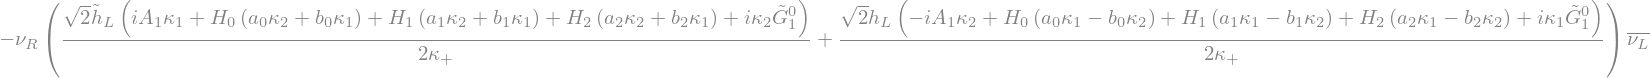

In [69]:
L_neutral

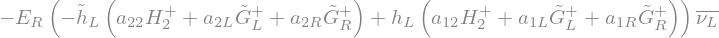

In [70]:
L_charged

$k_{1}\phi_{1}^{0}-k_{2}\phi_{2}^{0*}$

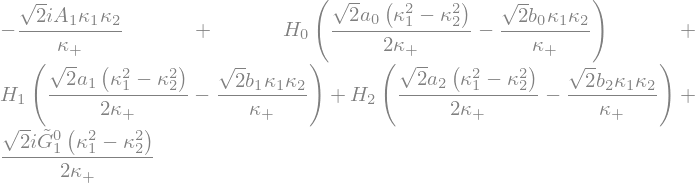

In [71]:
term_phi0nu1 = (kappa_1*phi1_0 - kappa_2*sp.conjugate(phi2_0)).expand().collect(
    [H_0, H_1, H_2, A_1, G_tilde_10],
    lambda x:x.collect([a_0,a_1,a_2], sp.simplify)
)
term_phi0nu1

$k_{1}\phi_{2}^{0*}-k_{2}\phi_{1}^{0}$

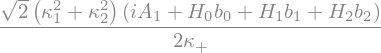

In [72]:
term_phi0nu2 = (kappa_1*sp.conjugate(phi2_0)- kappa_2*phi1_0).expand().collect(
    [H_0, H_1, H_2, A_1, G_tilde_10],
    lambda x:x.collect([a_0,a_1,a_2], sp.simplify)
).simplify()
term_phi0nu2

$k_{1}\phi_{1}^{0*}-k_{2}\phi_{2}^{0}$

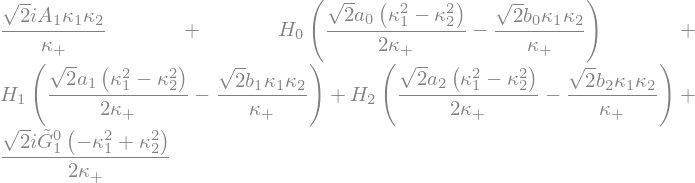

In [73]:
term_phi0e1 = (kappa_1*sp.conjugate(phi1_0) - kappa_2*phi2_0).expand().collect(
    [H_0, H_1, H_2, A_1, G_tilde_10],
    lambda x:x.collect([a_0,a_1,a_2], sp.simplify)
)
term_phi0e1

$k_{1}\phi_{2}^{0}-k_{2}\phi_{1}^{0*}$

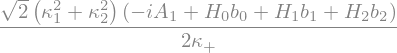

In [74]:
term_phi0e2 = (kappa_1*phi2_0 - kappa_2*sp.conjugate(phi1_0)).expand().collect(
    [H_0, H_1, H_2, A_1, G_tilde_10],
    lambda x:x.collect([a_0,a_1,a_2], sp.simplify)
).simplify()
term_phi0e2 

$$k_{1}\phi_{1}^{+}+k_{2}\phi_{2}^{+}$$
$$k_{2}\phi_{1}^{+}+k_{1}\phi_{2}^{+}$$

In [75]:
term_phip1 = (kappa_1*phi1_plus + kappa_2*phi2_plus).expand().collect(
    [G_tilde_Lp, H2_plus, G_tilde_Rp],
    )
term_phip2 = (kappa_2*phi1_plus + kappa_1*phi2_plus).expand().collect(
    [G_tilde_Lp, H2_plus, G_tilde_Rp],
    )
display(term_phip1, term_phip2)

$$k_{1}\phi_{1}^{-}-k_{2}\phi_{2}^{-}$$
$$k_{1}\phi_{2}^{-}-k_{2}\phi_{1}^{-}$$

In [76]:
term_phim1 = (kappa_1*sp.conjugate(phi1_plus) - kappa_2*sp.conjugate(phi2_plus)).expand().collect(
    [sp.conjugate(G_tilde_Rp), sp.conjugate(H2_plus), sp.conjugate(G_tilde_Lp)],
    ).simplify()
term_phim2 = (kappa_1*sp.conjugate(phi2_plus) - kappa_2*sp.conjugate(phi1_plus)).expand().collect(
    [sp.conjugate(G_tilde_Rp), sp.conjugate(H2_plus), sp.conjugate(G_tilde_Lp)],
    ).simplify()
display(term_phim1, term_phim2)


Neutral Scalars Interaction Terms:



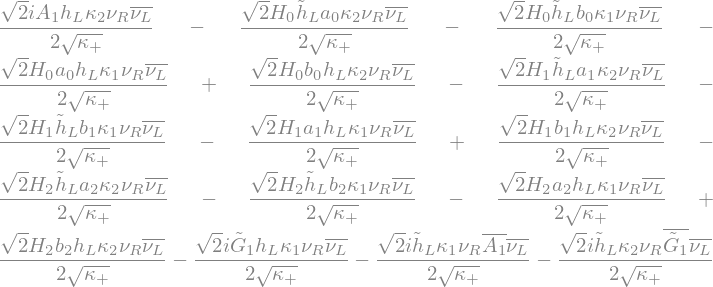

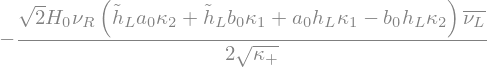

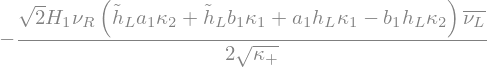

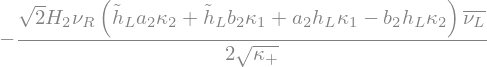

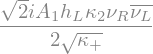

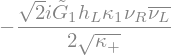


Charged Scalars Interaction Terms:



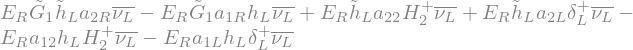


Doubly Charged Scalars Interaction Terms:



In [129]:

# Expand Lagrangian terms
L_neutral_expanded = sp.expand(L_neutral)
L_charged_expanded = sp.expand(L_charged)
L_doubly_charged_expanded = sp.expand(L_doubly_charged)

# Display results
print("\nNeutral Scalars Interaction Terms:\n")
display(L_neutral_expanded)
display(
    L_neutral_expanded.coeff(H_0).expand().collect(H_0, lambda x:x.collect([h_L, h_tilde_L], factor)).factor()*H_0,
    L_neutral_expanded.coeff(H_1).expand().collect(H_1, lambda x:x.collect([h_L, h_tilde_L], factor)).factor()*H_1,
    L_neutral_expanded.coeff(H_2).expand().collect(H_2, lambda x:x.collect([h_L, h_tilde_L], factor)).factor()*H_2,
    L_neutral_expanded.coeff(A_1).factor()*A_1,
    L_neutral_expanded.coeff(G_tilde_1).factor()*G_tilde_1,
)
print("\nCharged Scalars Interaction Terms:\n")
display(L_charged_expanded)
print("\nDoubly Charged Scalars Interaction Terms:\n")
display(L_doubly_charged_expanded)



Neutral Scalars Interaction Terms:



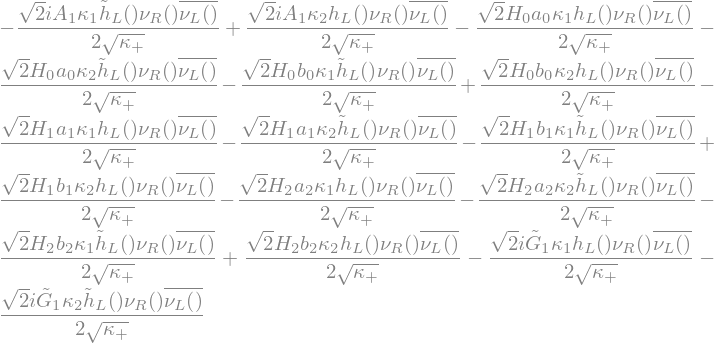

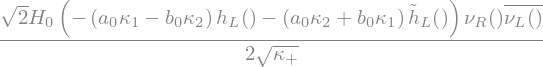

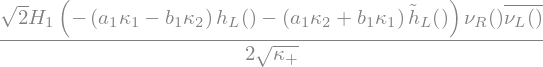

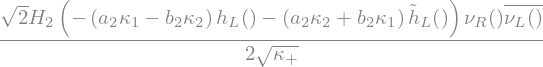

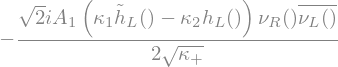

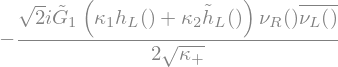


Charged Scalars Interaction Terms:



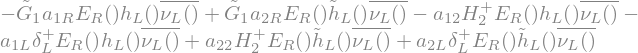


Doubly Charged Scalars Interaction Terms:



In [147]:
import sympy as sp

# Define symbols
kappa_1, kappa_2, kappa_plus = sp.symbols("kappa_1 kappa_2 kappa_+", positive=True)
h_L, h_tilde_L, h_M = sp.symbols(r"h_L \tilde{h}_L h_M", cls=sp.Function)
a_0, a_1, a_2 = sp.symbols("a_0 a_1 a_2", real=True)
b_0, b_1, b_2 = sp.symbols("b_0 b_1 b_2", real=True)

# Physical fields
H_0, H_1, H_2, H_3 = sp.symbols("H_0 H_1 H_2 H_3", real=True)  # Scalars
G_tilde_1, G_tilde_2, A_1, A_2 = sp.symbols(r"\tilde{G}_1 \tilde{G}_2 A_1 A_2", real=True)  # Goldstones
H1_plus, H2_plus = sp.symbols("{{H_1^+}} {{H_2^+}}", real=True)  # Charged scalars
delta_L_plus, delta_L_pp = sp.symbols(r"{{\delta_L^+}} {{\delta_L^{++}}}", real=True)  # Doubly charged scalar

# Mixing coefficients
a_12, a_22, a_1R, a_2R, a_1L, a_2L = sp.symbols("a_{12} a_{22} a_{1R} a_{2R} a_{1L} a_{2L}", real=True)

# Fermion spinors
nu_L, nu_R = sp.symbols("nu_L nu_R", cls=sp.Function)
E_L, E_R = sp.symbols("E_L E_R", cls=sp.Function)

# Scalar fields in terms of physical fields
phi1_0 = (1 / sp.sqrt(2 * kappa_plus)) * (
    H_0 * (kappa_1 * a_0 - kappa_2 * b_0) +
    H_1 * (kappa_1 * a_1 - kappa_2 * b_1) +
    H_2 * (kappa_1 * a_2 - kappa_2 * b_2) +
    sp.I * kappa_1 * G_tilde_1 - sp.I * kappa_2 * A_1
)

phi2_0 = (1 / sp.sqrt(2 * kappa_plus)) * (
    H_0 * (kappa_2 * a_0 + kappa_1 * b_0) +
    H_1 * (kappa_2 * a_1 + kappa_1 * b_1) +
    H_2 * (kappa_2 * a_2 + kappa_1 * b_2) -
    sp.I * kappa_2 * G_tilde_1 - sp.I * kappa_1 * A_1
)

delta_L_0 = (1 / sp.sqrt(2)) * (H_3 + sp.I * A_2)

# Charged fields
phi1_plus = a_12 * H2_plus + a_1R * G_tilde_1 + a_1L * delta_L_plus
phi2_plus = a_22 * H2_plus + a_2R * G_tilde_1 + a_2L * delta_L_plus

# Lagrangian terms for physical fields
L_neutral = -nu_L().conjugate() * (h_L() * phi1_0 + h_tilde_L() * phi2_0.conjugate()) * nu_R()
L_charged = -nu_L().conjugate() * (h_L() * phi1_plus - h_tilde_L() * phi2_plus) * E_R()
L_doubly_charged = delta_L_pp * (h_M() * E_L().conjugate() * E_R().conjugate())

# Expand Lagrangian terms
L_neutral_expanded = sp.expand(L_neutral)
L_charged_expanded = sp.expand(L_charged)
L_doubly_charged_expanded = sp.expand(L_doubly_charged)

# Display results
print("\nNeutral Scalars Interaction Terms:\n")
display(L_neutral_expanded)
display(
    L_neutral_expanded.coeff(H_0).expand().collect(
        H_0, lambda x:x.collect([h_L(), h_tilde_L()], factor)
    ).simplify()*H_0,
    L_neutral_expanded.coeff(H_1).expand().collect(
        H_1, lambda x:x.collect([h_L(), h_tilde_L()], factor)
    ).simplify()*H_1,
    L_neutral_expanded.coeff(H_2).expand().collect(
        H_2, lambda x:x.collect([h_L(), h_tilde_L()], factor)
    ).simplify()*H_2,
    L_neutral_expanded.coeff(A_1).factor()*A_1,
    L_neutral_expanded.coeff(G_tilde_1).factor()*G_tilde_1,
)
print("\nCharged Scalars Interaction Terms:\n")
display(L_charged_expanded)
print("\nDoubly Charged Scalars Interaction Terms:\n")
display(L_doubly_charged_expanded)

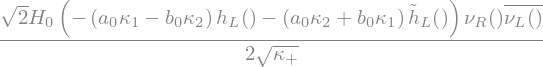

In [146]:
L_neutral_expanded.coeff(H_0).expand().collect(
    H_0, lambda x:x.collect([h_L(), h_tilde_L()], factor)
).simplify()*H_0

Consider the following Lagrangian
$$
\mathcal{L}_{Y}^{0}=\frac{1}{k_{-}^{2}\kappa_{+}}\sum_{r=0,1,2}\bar{n}_{L}\left[M_{\nu}^{\text{diag}}\left(a_{r}\kappa_{-}^{2}-2b_{r}\kappa_{1}\kappa_{2}\right)+K_{L}M_{\ell}^{\text{diag}}K_{R}^{\dagger}b_{r}k_{+}^{2}\right]n_{R}H_{r}^{0}\\
	+\frac{1}{k_{-}^{2}\kappa_{+}}\sum_{r=0,1,2}\bar{n}_{L}\left[-2i\kappa_{1}\kappa_{2}M_{\nu}^{\text{diag}}+ik_{+}^{2}K_{L}M_{\ell}^{\text{diag}}K_{R}^{\dagger}\right]n_{R}A_{1}+\frac{i}{\kappa_{+}}M_{\nu}^{\text{diag}}\bar{n}_{L}n_{R}\tilde{G}_{1}^{0}\\
	+\frac{1}{k_{-}^{2}\kappa_{+}}\sum_{r=0,1,2}\overline{E}_{L}\left[M_{\ell}^{\text{diag}}\left(a_{r}\kappa_{-}^{2}-2b_{r}\kappa_{1}\kappa_{2}\right)+K_{L}^{\dagger}M_{\nu}^{\text{diag}}K_{R}b_{r}k_{+}^{2}\right]E_{R}H_{r}^{0}\\
	+\frac{1}{k_{-}^{2}\kappa_{+}}\sum_{r=0,1,2}\overline{E}_{L}\left[2i\kappa_{1}\kappa_{2}M_{\ell}^{\text{diag}}-ik_{+}^{2}K_{L}^{\dagger}M_{\nu}^{\text{diag}}K_{R}\right]E_{R}A_{1}-\frac{i}{\kappa_{+}}M_{\ell}^{\text{diag}}\overline{E}_{L}E_{R}\tilde{G}_{1}^{0}\\
	+\frac{1}{2v_{R}}\overline{n}_{R}V_{L}^{\nu\top}V_{R}^{\nu*}M_{\nu}^{\text{diag}}V_{R}^{\nu\dagger}V_{L}^{\nu}n_{L}\left(H_{3}^{0}+iA_{2}^{0}\right)\\
	+\frac{1}{2v_{R}}\left(i\overline{n}_{L}M_{\nu}^{\text{diag}}n_{R}\tilde{G}_{2}^{0}+\sum_{r=0,1,2}\overline{n}_{L}M_{\nu}^{\text{diag}}c_{r}n_{R}H_{r}^{0}\right)+\text{ h.c. }
$$

where $n_{R,L}$ $E_{R,L}$ are neutrino and charged lepton spinors for each familie, $H_r^0$ with $r=0,1,2,3$, are neutral scalar fields, $G$ denotes goldstone bosons, finally, $A$ denote pseudoscalar. Also the following symbols denote matrices $K_{L,R}$, $M_{\nu,\ell}^{\text{diag}}$, and $V_{L,R}$